# Exercise Sheet 1

In [87]:
import nltk
annotated_sent = nltk.corpus.treebank.tagged_sents()

## Functions

In [173]:

#Functions
def features(sentence, index):
    return {
        'word': sentence[index],
        'is_capitalized': sentence[index][0].upper() == sentence[index][0],
        'prefix-1': sentence[index][0],
        'prefix-2': '' if len(sentence[index]) < 3 else sentence[index][1],
        'suffix-1': sentence[index][-1],
        'suffix-2': '' if len(sentence[index]) < 4 else sentence[index][-2],
        'prev_word' : '' if index == 0 else sentence[index - 1],
        'prev_word2': '' if index <  2 else sentence[index - 2],
        'next_word' : '' if index == len(sentence) - 1 else sentence[index + 1],
        'next_word2': '' if index >  len(sentence) - 3 else sentence[index + 2]
    }
def untag(tagged_sentence):
    return[w for w,t in tagged_sentence]

def untag2(tagged_sentence):
    return[t for w,t in tagged_sentence]

#Train and Test Sentences
def get_train_test(Corpus,splitvalue = .8):
        Corpus_tagged_sents = Corpus.tagged_sents()
        cutoff = int(splitvalue*len(Corpus_tagged_sents))
        Corpus_train = Corpus_tagged_sents[:cutoff]
        Corpus_test = Corpus_tagged_sents[cutoff:]
        return Corpus_train, Corpus_train

# Transform tagged (training) sentences from Corpus to X: features of the  words, y: Tags of the words
def transform_to_dataset(tagged_sentences):
    X, y = [], []
    for tagged in tagged_sentences:
        for index in range(len(tagged)):
            X.append(features(untag(tagged), index))
            y.append(tagged[index][1])
    return X, y


## Corpora

In [83]:
#Corpora
X1 = nltk.corpus.treebank
X2 = nltk.corpus.brown
#X3 = nltk.corpus.g
X3 = nltk.corpus.ConllCorpusReader('C:/Users/Tobias/sciebo/Studium/4._Semester/Lab_NLP/tigercorpus-2.2.conll09', 'tiger_release_aug07.corrected.16012013.conll09',
                                     ['ignore', 'words', 'ignore', 'ignore', 'pos'],
                                     encoding='utf-8')

X1_train_sentences, X1_test_sentences = get_train_test(X1,.8)
X2_train_sentences, X2_test_sentences = get_train_test(X2,.8)
X3_train_sentences, X3_test_sentences = get_train_test(X3,.8)


## Classifier

In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.pipeline import Pipeline

In [95]:
#def pos_tag(sentence, clf):
#    tagged_sentence = []
#    tags = clf.predict([features(sentence, index) for index in range(len(sentence))])
#    return zip(sentence, tags)

#print(list(pos_tag(nltk.tokenize.word_tokenize('Hello world, lets do something awesome today!'))))

# Task 1
#### get results for english (plot a graph with all classifiers x results)

    performance 1.1 = model1 in X1
    performance 1.2 = model2 in X1
    performance 1.3.x = model3.x in X1

    performance 1.4 = model1 in X2

    performance 1.5 = model2 in X2
    performance 1.6.x = model3.x in X2

In [106]:
#Variables
performance = [0.0 for i in range(14)]
performance_vec = ['1.1', '1.2', '1.3.1', '1.3.2', '1.3.3', '1.3.4', '1.3.5', 
                '1.4', '1.5', '1.6.1', '1.6.2', '1.6.3', '1.6.4', '1.6.5',]
print(performance)
print(performance_vec)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
['1.1', '1.2', '1.3.1', '1.3.2', '1.3.3', '1.3.4', '1.3.5', '1.4', '1.5', '1.6.1', '1.6.2', '1.6.3', '1.6.4', '1.6.5']


## Use Pickle

In [96]:
import pickle

#save = open( "classifier_X1", "wb" )
#pickle.dump( clf, save )
#save.close()
#clf2_f = open( "classifier_X1_75000-", "rb" )
#clf2 = pickle.load(clf2_f)
#clf2_f.close()

### Accuracy Model 1

In [170]:
# Train DecisionTreeClassifier, then test with clf.score
# We only train with a predefined number "size_of_training" of training sentences 
# and then take the arithmetic mean of the accuracies 
def Accuracy_Model1(train_sentences, test_sentences, Corpus,num_training_partitions = 1,num_test_partitions = 1 ):
    X_train,y_train = transform_to_dataset(train_sentences)
    accuracy = 0
    counter = 0
    step_size= int(len(X_train)/num_training_partitions)  #How many training patterns per training
    for a in range(0,len(X_train),step_size):

        print("Define classifier ", counter+1, "..")
        #define classifier
        clf = Pipeline([
            ('vectorizer', DictVectorizer(sparse=False)),
            ('classifier', DecisionTreeClassifier(criterion='entropy'))#sklearn.svm.NuSVC)#
        ])
        print("defining OK")

        # train classifier
        print("Train classifier..", counter+1, "..")
        clf.fit(X_train[a:a+step_size], y_train[a:a+step_size])
        #clf.fit(X_train[75000:], y_train[75000:])
        print('training OK')
        
        #Save classifier (Just for testing)
        #print("Save Classifier ", counter+1, "..")
        #filename = "classifier_"+ Corpus + "_" + str(a) + "-" + str(a+step_size-1)
        #save = open(filename, "wb" )
        #pickle.dump( clf, save )
        #save.close()
        #print("saving OK")

        print("Transform to Dataset..")
        X_test, y_test = transform_to_dataset(test_sentences)
        print("Data Transforming OK")
        step_size2= int(len(X_test)/num_test_partitions)
        for i in range(0,len(X_test),step_size2):
            counter += 1
            performance = clf.score(X_test[i:i+step_size2], y_test[i:i+step_size2])
            print("Accuracy: ", performance)
            accuracy += performance
    return (accuracy/counter)

In [119]:
performance[0] = Accuracy_Model1(X1_train_sentences, X1_test_sentences,"X1" ,10)
print(performance[0])

Define classifier  1 ..
defining OK
Train classifier.. 1 ..
training OK
Save Classifier  1 ..
saving OK
Transform to Dataset..
Data Transforming OK
Define classifier  2 ..
defining OK
Train classifier.. 2 ..
training OK
Save Classifier  2 ..
saving OK
Transform to Dataset..
Data Transforming OK
Define classifier  3 ..
defining OK
Train classifier.. 3 ..
training OK
Save Classifier  3 ..
saving OK
Transform to Dataset..
Data Transforming OK
Define classifier  4 ..
defining OK
Train classifier.. 4 ..
training OK
Save Classifier  4 ..
saving OK
Transform to Dataset..
Data Transforming OK
Define classifier  5 ..
defining OK
Train classifier.. 5 ..
training OK
Save Classifier  5 ..
saving OK
Transform to Dataset..
Data Transforming OK
Define classifier  6 ..
defining OK
Train classifier.. 6 ..
training OK
Save Classifier  6 ..
saving OK
Transform to Dataset..
Data Transforming OK
Define classifier  7 ..
defining OK
Train classifier.. 7 ..
training OK
Save Classifier  7 ..
saving OK
Transfor

In [171]:
performance[7] = Accuracy_Model1(X2_train_sentences[0:10000], X2_test_sentences[0:1000],"X2", 5,5)
print(performance[7])

Define classifier  1 ..
defining OK
Train classifier.. 1 ..


MemoryError: 

### Accuracy model 2 (pre-trained POS tagger model using NLTK

In [138]:
# Just use nltk.pos_tag_sents and compare it with the tagging by the corpus
def Accuracy_Model2(corpus):
    sents = corpus.sents()
    X_pred, y_pred = transform_to_dataset(nltk.pos_tag_sents(sents))
    X_test, y_test = transform_to_dataset(corpus.tagged_sents())
    hits = 0
    for i in range(len(y_test)):
        if y_pred[i] == y_test[i]:
            hits += 1
    
    return hits * 1.0/len(y_test)  #accuracy = hits/(hits+misses)

In [139]:
accuracy = Accuracy_Model2(X1)
print("Accuracy Model2 in X1:", accuracy)
performance[1] = accuracy

Accuracy Model2 in X1: 0.8929834319996821


In [140]:
accuracy2 = Accuracy_Model2(X2)
print("Accuracy Model2 in X2:", accuracy2)
performance[8] = accuracy2

Accuracy Model2 in X2: 0.619474643297577


### Accuracy model 3 (Rule-based POS taggers)

In [141]:
from nltk.corpus import brown
from nltk import DefaultTagger as df
from nltk import UnigramTagger as ut
from nltk import BigramTagger as bt
from nltk import TrigramTagger as tg


patterns = [(r'.*ing$', 'VBG'), (r'.*ed$', 'VBD'), (r'.*es$', 'VBZ'), (r'.*ould$', 'MD'), (r'.*\'s$', 'NN$'),               
             (r'.*s$', 'NNS'), (r'^-?[0-9]+(.[0-9]+)?$', 'CD'), (r'.*', 'NN')]

#brown_tagged_sents = brown.tagged_sents(categories='news')
#brown_sents = brown.sents(categories='news')

def Accuracy_Model3(train_sents,test_sents):
    #size = int(len(brown_tagged_sents) * 0.9)
    #train_sents = tagged_sents[:size]
    #test_sents = tagged_sents[size:]

    def_model = nltk.DefaultTagger('NN')
    uni_model = nltk.UnigramTagger(train_sents)
    bi_model = nltk.BigramTagger(train_sents)
    tri_model = nltk.TrigramTagger(train_sents)
    regexp_model = nltk.RegexpTagger(patterns)

    accuracy = []
    # performance of Default Tagger
    def_model.evaluate(train_sents)
    accuracy.append(def_model.evaluate(test_sents))
    # performance of Unigram Tagger
    uni_model.evaluate(train_sents)
    accuracy.append(uni_model.evaluate(test_sents))
    # performance of Bigram Tagger
    bi_model.evaluate(train_sents)
    accuracy.append(bi_model.evaluate(test_sents))
    # performance of Trigram Tagger
    tri_model.evaluate(train_sents)
    accuracy.append(tri_model.evaluate(test_sents))
    # performance of Regex Tagger
    regexp_model.evaluate(train_sents)
    accuracy.append(regexp_model.evaluate(test_sents))

    return accuracy

In [142]:
accuracy = Accuracy_Model3(X1_test_sentences, X1_test_sentences)
performance[2:7] = accuracy

In [143]:
accuracy = Accuracy_Model3(X2_test_sentences, X2_test_sentences)
performance[9:14] = accuracy

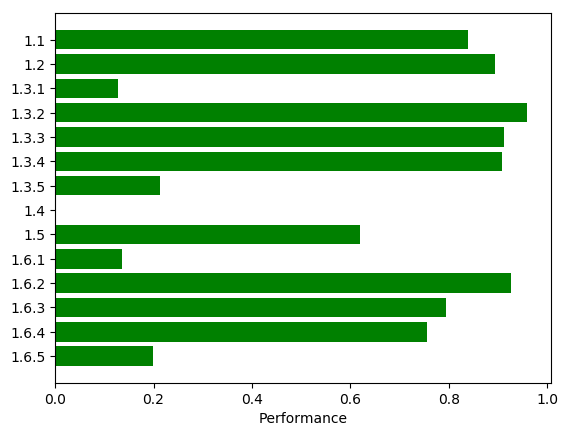

In [177]:
import matplotlib.pyplot as plt

plt.rcdefaults()
fig, ax = plt.subplots()

ax.barh(performance_vec,performance, align='center',
        color='green', ecolor='black')
ax.set_yticks(performance_vec)
ax.set_yticklabels(performance_vec)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')

plt.show()

# Task 2 (train your model with standard features)

## Accuracy Model 4

In [145]:
#Variables
performance2 = [0.0,0.0]
performance_vec2 = ['2.1','2.2']


[0.8379924848394656, 0.8929834319996821, 0.12729888264692388, 0.9597455262472562, 0.9118146756451753, 0.9085531455783326, 0.2138472413408237, 0.0, 0.619474643297577, 0.13525702141385765, 0.9252791314413574, 0.7951443684759597, 0.7561670235983202, 0.1989790189517438]
['1.1', '1.2', '1.3.1', '1.3.2', '1.3.3', '1.3.4', '1.3.5', '1.4', '1.5', '1.6.1', '1.6.2', '1.6.3', '1.6.4', '1.6.5']


In [ ]:
performance2[0] = Accuracy_Model1(X3_train_sentences[0:10000], X3_test_sentences[0:10000],"X3",10,10)
print(performance2[0])

In [ ]:
def features_german(sentence,index):
    return {
        'word': sentence[index],
        'is_capitalized': sentence[index][0].upper() == sentence[index][0],
        'prefix-1': sentence[index][0],
        'prefix-2': '' if len(sentence[index]) < 3 else sentence[index][1],
        'suffix-1': sentence[index][-1],
        'suffix-2': '' if len(sentence[index]) < 4 else sentence[index][-2],
        'prev_word' : '' if index == 0 else sentence[index - 1],
        'prev_word2': '' if index <  2 else sentence[index - 2],
        'next_word' : '' if index == len(sentence) - 1 else sentence[index + 1],
        'next_word2': '' if index >  len(sentence) - 3 else sentence[index + 2]
            }

## Accuracy Model 5